### Student Information
Name:李恩

Student ID:114033634

GitHub ID:NN92002

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [135]:
### Begin Assignment Here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import helpers.data_mining_helpers as dmh
import nltk
import math
nltk.download("punkt")
nltk.download("punkt_tab")
ND = pd.read_csv(r"C:\Users\AN515\Desktop\DM2025-Lab1-Exercise\newdataset\Reddit-stock-sentiment.csv")
print(len(ND))
print(ND.columns)


847
Index(['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url',
       'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity',
       'polarity', 'sentiment', 'entities', 'label'],
      dtype='object')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AN515\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\AN515\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [136]:
ND[::100]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
100,comment,2025-04-11 15:01:48,mmknyf6,StockMarket,The Trump administration is begging Xi Jinping...,Darkstar197,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,Do we have a copy of trump’s kindergarten grad...,0.400000,-0.050000,-1.0,"['certificate', 'version', 'form', '’', 'trump...",-1.0
200,comment,2025-04-11 14:42:17,mmkk04x,StockMarket,Trump: We Are Doing Really Well On Our Tariff ...,coochellamai,https://i.redd.it/uajqu4kxl7ue1.png,1,NaN,NaN,I need people to understand this man is NOT st...,0.604242,-0.260227,-1.0,"['plan', 'goal', 'man', 'USD', 'US', 'economy'...",1.0
300,comment,2022-04-23 20:11:55,i5x0o24,stockstobuytoday,Technical Analysis Thread.,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,NaN,NaN,[/](/),0.000000,0.000000,0.0,"['/', ']']",0.0
400,comment,2025-04-11 14:30:36,mmkhog3,StockMarket,"Trump is surrounded by a bunch of idiots, he s...",gonzo0815,https://i.redd.it/c2mmpy3qf7ue1.png,1,NaN,NaN,Imo it's bullshit for another reason: why woul...,0.391667,0.016667,1.0,"['reason', 'anything', 'relation', 'point', 'g...",-1.0
500,comment,2025-04-11 14:27:20,mmkh0uf,StockMarket,The Trump administration is begging Xi Jinping...,Bloodsucker_,https://edition.cnn.com/2025/04/10/politics/tr...,-2,NaN,NaN,Everyone is talking about the Bond market. But...,0.500000,0.000000,0.0,"['year', 'bond', 'everyone', 'market', 'Bond',...",0.0
600,comment,2025-04-11 13:55:11,mmkaotn,wallstreetbets,Weekly Earnings Thread 4/14 - 4/18,grhotz,https://i.redd.it/b51iqmecn7ue1.jpeg,2,NaN,NaN,Bank week is so boring. PUTS on NFLX,1.000000,-1.000000,-1.0,"['week', 'Bank', 'NFLX', 'Bank week']",-1.0
700,comment,2025-04-12 1:09:59,mmntum6,wallstreetbets,Retail giant TARGET has now declined for 10 co...,CuttyAllgood,https://i.redd.it/7tl6puv9waue1.jpeg,36,NaN,NaN,Donno why you’re getting downvoted. You’re not...,0.900000,-0.500000,-1.0,"['Donno', 'IMO']",1.0
800,comment,2025-04-11 15:27:34,mmkt7j7,stocks,Is the market in complete denial right now?,Vlistorito,https://www.reddit.com/r/stocks/comments/1jwo1...,4,NaN,NaN,"It's a pretty unremarkable product, but you wo...",0.625000,0.333333,1.0,"['information', 'distributor', 'product', 'com...",0.0


In [137]:
# 查看所有欄位的型態
ND[ND["text"].apply(lambda x: len(x) < 10)].head(5)

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
21,comment,2025-04-06 23:31:33,mls3ha1,stockstobuytoday,If you had $10k in cash…,Either_Breadfruit_90,https://www.reddit.com/r/stockstobuytoday/comm...,1,NaN,NaN,GEO WM,0.0,0.0,0.0,"['GEO', 'WM']",0.0
37,comment,2025-03-04 0:43:03,mfvnxnj,stocks,Rate My Portfolio - r/Stocks Quarterly Thread ...,BippityBoppitty69,https://www.reddit.com/r/stocks/comments/1j0w7...,5,NaN,NaN,Cash,0.0,0.0,0.0,['Cash'],0.0
41,comment,2021-05-03 22:17:48,gwu560b,stockstobuytoday,"Shorted Stocks - Hedges crushing NAKD, FAMI, S...",Limp-Project5733,https://www.reddit.com/r/stockstobuytoday/comm...,1,NaN,NaN,And plug,0.0,0.0,0.0,['plug'],0.0
55,comment,2025-04-11 16:00:46,mml01xt,stocks,The US bond market is continuing to crash. Wil...,J3ster14,https://www.reddit.com/r/stocks/comments/1jwsz...,1,NaN,NaN,The steal,0.0,0.0,0.0,['steal'],0.0
109,comment,2025-04-10 14:34:18,mme7ouv,StockMarket,How do you feel about a sitting president maki...,TimoGloc,https://apnews.com/article/trump-truth-social-...,7,NaN,NaN,FELON,0.0,0.0,0.0,['FELON'],-1.0


In [138]:
ND[ND["type"]=="comment"][::50]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
52,comment,2025-04-11 15:12:13,mmkq2am,wallstreetbets,[IPO] AIRO IPO: Aerospace & Defense Play at $1...,likeitis121,https://i.redd.it/n22xlqjix7ue1.jpeg,2,NaN,NaN,>I did some digging and found they had a gover...,0.000000,0.000000,0.0,"[']', 'contract', 'Lockheed', 'Defense', 'gove...",-1.0
106,comment,2025-04-11 15:07:23,mmkp2zk,StockMarket,The Trump administration is begging Xi Jinping...,Bartallica,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,Over 9000%!,0.000000,0.000000,0.0,['%'],0.0
157,comment,2025-04-11 12:39:55,mmjxm0w,stocks,Is the market in complete denial right now?,Idontlikeredditorss,https://www.reddit.com/r/stocks/comments/1jwo1...,3,NaN,NaN,China raised tariffs even MORE a few hours ago...,0.525000,-0.350000,-1.0,"['yo', 'Bing', 'life', 'Fuck', 'bong', 'market...",-1.0
215,comment,2024-04-10 12:59:19,kywypcj,stockstobuytoday,Anyone seen the latest $PSQH news?,adetailgeek,https://www.reddit.com/r/stockstobuytoday/comm...,2,NaN,NaN,Now this is some wholesome stuff more companie...,0.000000,0.000000,0.0,['stuff'],1.0
266,comment,2025-04-11 21:22:20,mmmrtzq,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,OPINION_IS_REGARDED,https://www.reddit.com/r/wallstreetbets/commen...,22,NaN,NaN,I am so addicted to this market I can't wait f...,0.600000,-0.400000,-1.0,"['Monday', 'market']",1.0
317,comment,2025-04-10 16:06:40,mmeqe69,stocks,PRESIDENT TRUMP JUST ASKED THE SUPREME COURT F...,LatinHoser,https://www.reddit.com/r/stocks/comments/1jvzr...,2,NaN,NaN,What the actual fuck?,0.350000,-0.200000,-1.0,['fuck'],-1.0
375,comment,2025-04-10 16:52:24,mmezojg,StockMarket,How do you feel about a sitting president maki...,Xerio_the_Herio,https://apnews.com/article/trump-truth-social-...,2,NaN,NaN,Money and power go together... it's sick in th...,0.857143,-0.714286,-1.0,"['context', 'power', 'Money']",-1.0
433,comment,2021-02-01 17:19:02,glmekov,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",AtomicPhantomBlack,https://www.reddit.com/r/stocks/comments/la34b...,1,NaN,NaN,The thing is is that paper silver is much more...,0.171429,0.100000,1.0,"['thing', 'silver', 'paper']",0.0
491,comment,2025-04-11 6:38:09,mmitxzi,StockMarket,$ U.S. dollar value (crashing),Spinoza42,https://i.redd.it/atvlo83gk4ue1.jpeg,7,NaN,NaN,"Look up ""Dark Gothic MAGA how Tech billionaire...",0.233333,-0.116667,-1.0,"['plan', 'goal', 'Dark', 'US', 'stone', 'end',...",-1.0


In [139]:
ND.isnull().apply(lambda x: dmh.check_missing_values(x))

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,0,0,0,783,783,0,0,0,0,0,0


In [140]:
print(sum(ND.duplicated()))
ND.drop_duplicates(keep=False, inplace=True)
print(len(ND))


0
847


In [141]:
ND_sample = ND.sample(n = 100)
print(len(ND))
ND_sample[::20]

847


,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
45,comment,2023-04-27 14:04:06,jhx5de4,stockstobuytoday,Don’t Shoot The Messenger 🤷‍♂️,HarleyDog67,https://i.redd.it/lm63in0wyawa1.jpg,2,NaN,NaN,100% fact! Truth hurts.,0.000000,0.000000,0.0,"['fact', '%', 'Truth']",0.0
392,comment,2025-04-11 5:13:17,mmikw8o,stocks,U.S. 10-year Treasury yields rise as Trump tar...,21plankton,https://www.reddit.com/r/stocks/comments/1jwfy...,2,NaN,NaN,Trump has now completely proven China is #1. ...,0.397500,0.062083,1.0,"['day', 'Trump', 'dollar', 'period', 'way', 'p...",-1.0
532,comment,2025-04-11 15:31:37,mmku1hx,stocks,Is the market in complete denial right now?,LowSlipLowz,https://www.reddit.com/r/stocks/comments/1jwo1...,1,NaN,NaN,And so far 50+ countries have come to the tabl...,0.841667,0.275000,1.0,"['U.S.', 'EU', 'U.S', 'economy', 'weight', 'so...",1.0
575,comment,2025-04-11 12:42:52,mmjy2ne,StockMarket,Data Shows US Allies—Not China—Dumping Treasuries,trollhaulla,https://i.redd.it/31r650bss4ue1.jpeg,1,NaN,NaN,The assumption underlying your statement is th...,0.000000,0.000000,0.0,"['lesson', 'aptitude', 'statement', 'capabilit...",0.0
481,comment,2021-11-10 1:46:10,hk0j4np,stockstobuytoday,$NAKD turning Electric. Stock goes ballistc,njsh20,https://www.reddit.com/r/stockstobuytoday/comm...,1,NaN,NaN,Newbie here.. what is a definitive stick for s...,0.000000,0.000000,0.0,"['Newbie', 'agreement', 'acquisition', 'stick'...",0.0


730
author
saasfin          57
AutoModerator    15
bullrfuk          5
MutaliskGluon     3
FarrisAT          3
Name: count, dtype: int64


<Axes: title={'center': 'top 5 author'}, xlabel='author'>

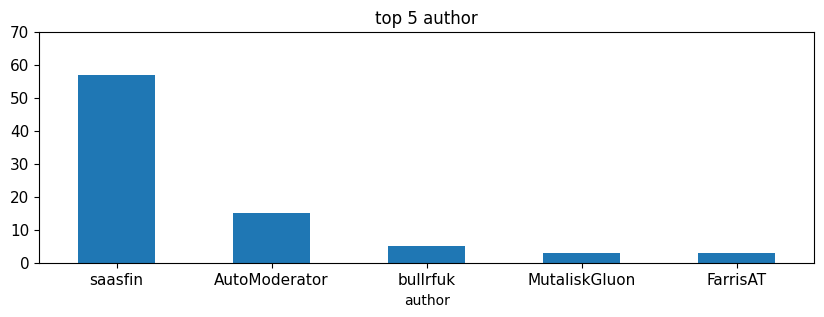

In [142]:
ND_notdeleted =ND[ND["author"]!= "[deleted]"]
print(len(ND_notdeleted["author"].value_counts()))
print(ND_notdeleted["author"].value_counts().head(5))
top = ND_notdeleted["author"].value_counts().head(5)
top.plot(kind = 'bar',
                title = 'top 5 author',
                ylim = [0, 70],        
                rot = 0, fontsize = 11, figsize = (10,3))

88
author
saasfin          8
AutoModerator    4
bro-v-wade       1
HarleyDog67      1
LazyKidd420      1
Name: count, dtype: int64


<Axes: title={'center': 'top 5 author'}, xlabel='author'>

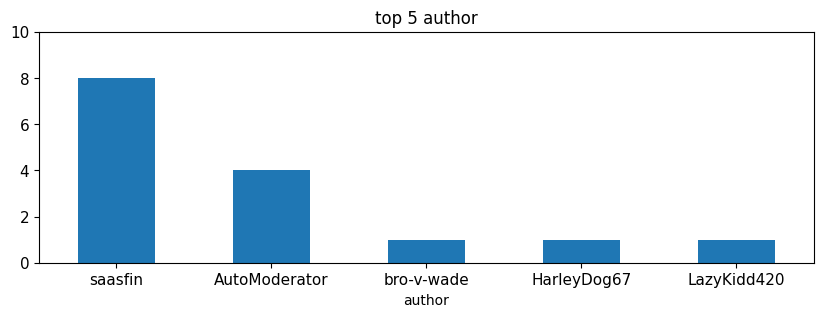

In [143]:
ND_sample_notdeleted =ND_sample[ND_sample["author"]!= "[deleted]"]
print(len(ND_sample_notdeleted["author"].value_counts()))
print(ND_sample_notdeleted["author"].value_counts().head(5))
top_sample = ND_sample_notdeleted["author"].value_counts().head(5)
top_sample.plot(kind = 'bar',
                title = 'top 5 author',
                ylim = [0, 10],        
                rot = 0, fontsize = 11, figsize = (10,3))

<Axes: title={'center': 'top 5 author comparison'}, xlabel='author'>

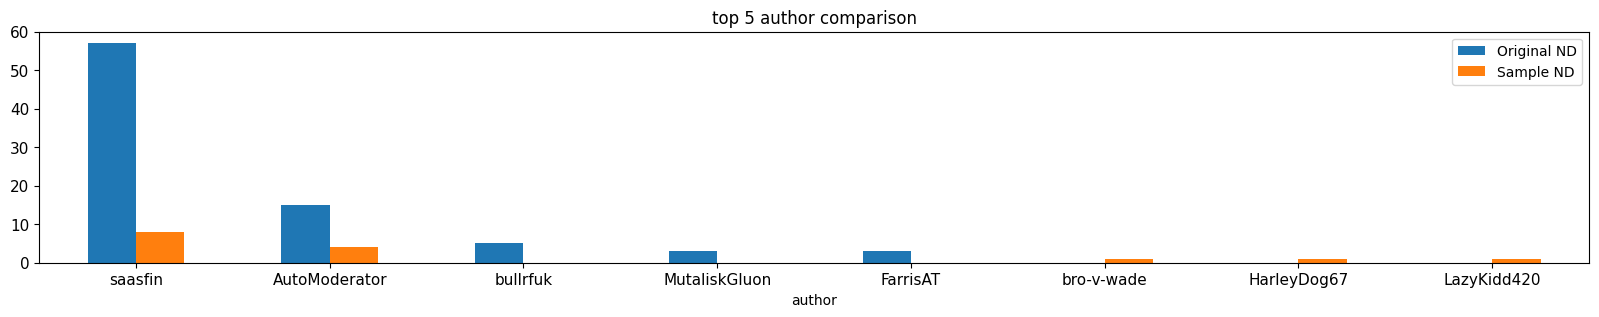

In [144]:
df = pd.concat([top.rename("Original ND"), top_sample.rename("Sample ND")],axis=1)

df.plot(kind = 'bar',
        title = 'top 5 author comparison',
        ylim = [0, 60],        
        rot = 0, fontsize = 11, figsize = (20,3))


In [146]:
ND.shape

(847, 16)

In [158]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
ND_counts = count_vect.fit_transform(ND.text)
print(ND_counts[0])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3 stored elements and shape (1, 4346)>
  Coords	Values
  (0, 692)	1
  (0, 2706)	1
  (0, 3248)	1


In [154]:
count_vect.get_feature_names_out()[692]

'calls'

In [155]:
count_vect.get_feature_names_out()[2706]

'on'

In [156]:
count_vect.get_feature_names_out()[3248]

'retards'

In [159]:
analyze = count_vect.build_analyzer()
analyze(ND.text[0])

['calls', 'on', 'retards']

In [ ]:
count_vect.get_feature_names_out()[0:10]


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [163]:
ND_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [164]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

In [167]:
row, col =np.where(ND_counts[0:5, 0:100].toarray() > 0) 
for n in col:
    print(count_vect.get_feature_names_out()[n])

116


In [168]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_x

['term_00',
 'term_000',
 'term_01378',
 'term_02',
 'term_027',
 'term_03',
 'term_06',
 'term_08',
 'term_10',
 'term_100',
 'term_1000',
 'term_10000',
 'term_100k',
 'term_100x',
 'term_10k',
 'term_10ks',
 'term_10yr',
 'term_11',
 'term_116',
 'term_118']

In [170]:
plot_y = ["doc_"+ str(i) for i in list(ND.index)[0:20]]
plot_y

['doc_0',
 'doc_1',
 'doc_2',
 'doc_3',
 'doc_4',
 'doc_5',
 'doc_6',
 'doc_7',
 'doc_8',
 'doc_9',
 'doc_10',
 'doc_11',
 'doc_12',
 'doc_13',
 'doc_14',
 'doc_15',
 'doc_16',
 'doc_17',
 'doc_18',
 'doc_19']

In [171]:
plot_z = ND_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

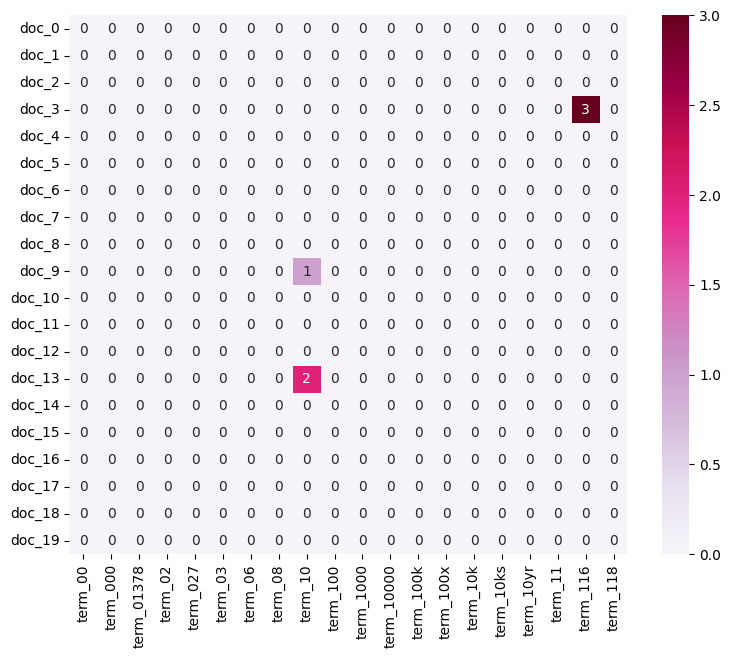

In [173]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=3, annot=True)

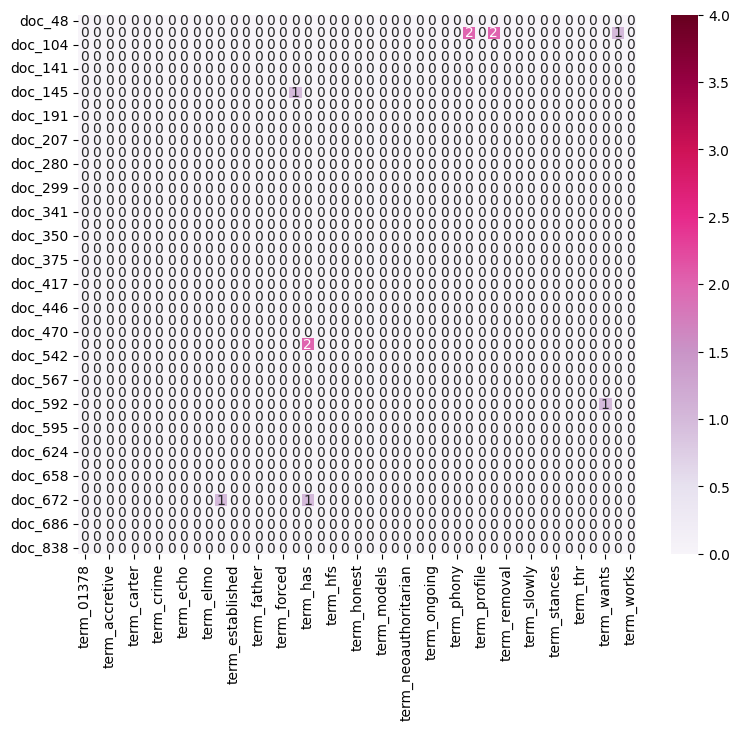

In [175]:
#隨機45個詞
rd_terms = np.random.choice(ND_counts.shape[1], 45, replace=False)
rd_terms = np.sort(rd_terms)#依序
terms = [count_vect.get_feature_names_out()[i] for i in rd_terms]

#隨機45篇文
rd_docs = np.random.choice(ND_counts.shape[0], 45, replace=False)
rd_docs = np.sort(rd_docs)

plot_x = ["term_"+str(i) for i in terms]
plot_y = ["doc_"+ str(i) for i in rd_docs]
plot_z = ND_counts[rd_docs][:,rd_terms].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=4, annot=True)

In [177]:
import plotly.graph_objects as go
term_frequencies = np.asarray(ND_counts.sum(axis=0)).ravel()
terms = count_vect.get_feature_names_out()
# 選出出現次數最高的前 300 個詞
top_idx = np.argsort(term_frequencies)[::-1][:300]
top_terms = terms[top_idx]
top_freqs = term_frequencies[top_idx]
fig = go.Figure(data=[go.Bar(x=top_terms, 
                             y=top_freqs,
                             marker_color='indianred')])
fig.update_layout(title='Top 300 Terms by Frequency',
                  xaxis_title='Terms',
                  yaxis_title='Frequencies',
                  xaxis_tickangle=-45,
                  width=1000, height=500)
fig.show()

In [178]:
# 不要先截斷 term_frequencies，直接保留全部詞頻
term_frequencies_all = np.asarray(ND_counts.sum(axis=0)).ravel()
terms = count_vect.get_feature_names_out()

# 找出全體詞彙裡出現次數最高的前 30 個
top_idx = np.argsort(term_frequencies_all)[::-1][:30]
top_terms = terms[top_idx]
top_freqs = term_frequencies_all[top_idx]

# 畫圖（保持你原本的格式）
fig = go.Figure(data=[go.Bar(x=top_terms, 
                             y=top_freqs,
                             marker_color='indianred')])
fig.update_layout(title='Top 30 Terms',
                  xaxis_title='Terms',
                  yaxis_title='Frequencies',
                  xaxis_tickangle=-45,
                  width=1000, height=500)
fig.show()

# Phase 2

In [145]:
### Begin Assignment Here